In [1]:
import os
os.chdir("../")

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from model import reliability,inference,experiment
from IPython.html.widgets import interact
import pickle
sns.set(style="whitegrid")
sns.set_context("paper")

:0: FutureWarning: IPython widgets are experimental and may change in the future.


Assume the observation history is $H = \cup_i H_i$ generated by the above process.
Also let $\beta = (\beta_1, \ldots, \beta_D)$, $\alpha = \{\alpha^1_1, \ldots, \alpha^1_{n_1}, \ldots, \alpha^I_{1}, \ldots, \alpha^I_{n_I}\}$, $\pi = (\pi_1, \ldots, \pi_S)$, and $[0, T]$ be the time of the study. 

 [paper](../../svn_sws/papers/reliability_network/draft/reliablity.pdf)
 
 \begin{align}
\lambda^i_j (t) = \beta_{d_i} + \alpha^i_{s^i_j}.
\end{align}

\begin{align}
s^i_j \sim \text{Cat}(\pi_1, \ldots, \pi_S)
\end{align}


In [3]:
model = experiment.generateModel(s=5,d=23,items = 10)
T = 40
result = reliability.simulator(model,T)

## Sample data

The following histogram shows distribution of websites($\pi$) and the shade of each column indicates the reliability of the site($\alpha$), the darker the less reliable or larger the intensity. The image on the right is a draw from the model with fixed number of documents and items per document. The darker a box, the larger the intensity will be and thus more likely to change in subsequent steps. The third plot shows the samples evolving after 10 units of time.

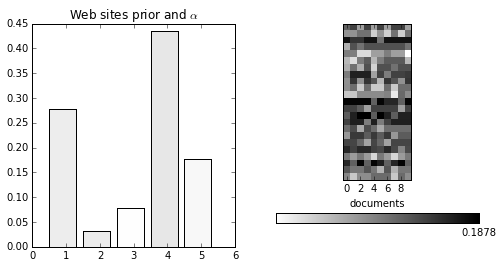

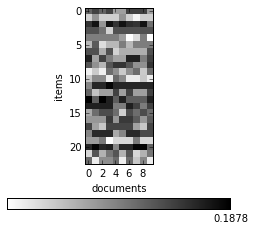

In [4]:
max_int = np.max(model['alpha'])+np.max(model['beta'])
def plot(t):
  I = reliability.intensityGrid(model,result,0)
  plt.figure(figsize=(8,4))
  ax = plt.subplot2grid((1,2),(0,0))
  ax.bar(np.arange(model['sites'])+0.5,model['pi'],color=cm.gray_r(model['alpha']))
  ax.set_title("Web sites prior and $\\alpha$")
  model['alpha']
  ax = plt.subplot2grid((1,2),(0,1))
  cmap = ax.imshow(I,cmap=cm.gray_r,interpolation='nearest')
  ax.set_xlabel("documents")
  ax.get_yaxis().set_visible(False)
  cbar = plt.colorbar(cmap, ticks=[0, np.max(I)], orientation='horizontal')
  plt.figure(figsize=(4,4))
  I = reliability.intensityGrid(model,result,t)
  cmap = plt.imshow(I,cmap=cm.gray_r,interpolation='nearest')
  plt.xlabel("documents")
  plt.ylabel('items')
  _ = plt.colorbar(cmap, ticks=[0,max_int], orientation='horizontal')
_ = interact(plot,t=(0,T,1))

##Inference:


\begin{align}
L(\beta, \alpha, \pi) & 
= P(H | \beta, \alpha,\pi) 
= \prod_{i=1}^I P(H_i | \beta, \alpha, \pi) \\ &
%
=  \prod_{i=1}^I  \prod_{j=1}^{n_i} P(t^i_j, \tau^i_j | \beta_{d_i}, \alpha^i_j, \tau^i_{j-1}) \,   P( s^i_j |  \pi_{ s^i_j})  \\ &
=  \prod_{i=1}^I \prod_{j=1}^{n_i} (\beta_{d_i}+\alpha^i_j)(\tau^i_{j}-t^i_{j}) \, e^{(\beta_{d_i}+\alpha^i_j)(\tau^i_{j}-t^i_{j})}
%
\end{align}
And the loglikelihood will be:
\begin{align*}
L =  & \sum_{i=1}^I  \sum_{j=1}^{n_i-1}  
\log(\pi_{s^i_j}) +
 \log\big((\beta_{d_i}+\alpha_{s^i_j}) (\tau^i_j-t^i_j)\big)
      -(\beta_{d_i}+\alpha_{s^i_j})(\tau^i_j-t^i_j) \\
       & +
   \sum_{i=1}^I 
   -(\beta_{d_i}+\alpha_{s_i^j})(\tau^i_{n_i}-t^i_{n_i}) 
  \end{align*}

##Experiments

In [5]:
output_dir = "./outputs_bak/"
path = ""

In [6]:
import datetime
from IPython.html import widgets
from IPython.display import display, clear_output
import pylab

In [7]:
def plot(data,t):
  max_int = np.max(data['model']['alpha'])+np.max(data['model']['beta'])
  I = reliability.intensityGrid(data['model'],data['data'],0)
  plt.figure(figsize=(8,8))
  ax = plt.subplot2grid((2,2),(0,0))
  ax.bar(np.arange(data['model']['sites'])+0.5,data['model']['pi'],color=cm.gray_r(data['model']['alpha']))
  ax.set_title("Web sites prior and $\\alpha$")
  ax = plt.subplot2grid((2,2),(0,1))
  cmap = ax.imshow(I,cmap=cm.gray_r,interpolation='nearest')
  ax.set_xlabel("documents")
  ax.set_ylabel("items")
  cbar = plt.colorbar(cmap, ticks=[0, np.max(I)], orientation='horizontal')
  ax = plt.subplot2grid((2,2),(1,0))
  I = reliability.intensityGrid(data['model'],data['data'],t)
  cmap = ax.imshow(I,cmap=cm.gray_r,interpolation='nearest')
  ax.set_xlabel("documents")
  ax.set_ylabel('items')
  ax.set_title('$\\lambda$ at time %f' % t)
  _ = plt.colorbar(cmap, ticks=[0,max_int], orientation='horizontal')
  ax = plt.subplot2grid((2,2),(1,1))
  beta_diff = (np.abs(data['beta'] - data['model']['beta'])**2).mean()
  alpha_diff = (np.abs(data['alpha'] - data['model']['alpha'])**2).mean()
  pi_diff = (np.abs(data['pi'] - data['model']['pi'])**2).mean()
  ax.bar([0,1,2],[beta_diff,alpha_diff,pi_diff])
  pylab.xticks([0.5,1.5,2.5],['$\\beta$','$\\alpha$','$\\pi$'])
  ax.set_title('parameters error(MSE)')

In [8]:
data,path = experiment.experiment(s=5,d=20,items=10,T=5,fix_pi=False,fix_alpha=False,
                                  fix_beta=False,name="all",output_path = output_dir,b=1.1,a=2.0)

In [9]:
from model import utils

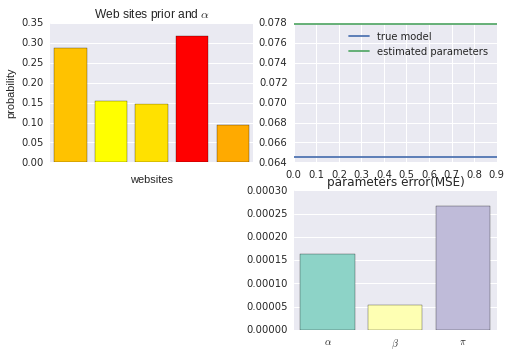

In [10]:
text = widgets.Text(value ="0")
li = widgets.Select(
    options=os.listdir(output_dir),
    value = os.listdir(output_dir)[-1],
    description='experiment',
)
display(text)
display(li)
def on_value_change(value):
  global data
  clear_output()
  fi = open(os.path.join(output_dir,li.value),'rb')
  data = pickle.load(fi)
  utils.plot(data,float(text.value),0)
  
  
text.on_submit(on_value_change)
#li.on_trait_change(on_value_change)
#on_value_change("10")


+ increasing number of documents improve beta
+ pi converges irrespective of other parameters
+ increasing items improtve beta
+ longer studies improve beta